# PA005: High Value Customer Identification(Insiders)

## 0.0. Planejamento da Solução (IOT)

## Input - Entrada

1. Problema de Negócio
    - Selecionar os clientes mais caliosos para integrar um programa de Fidelização.
2. Conjunto de Dados
    - Vendas de um e-commerce online, durante o período de um ano.

## Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
    - Lista: client_id | is_insider |
    
            10323 | yes/1
            32413 | no/1


2. Relatório com as respostas das perguntas de negócio
    - Quem são as pessoas elegíveis para participar do programa de Insiders?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
    - Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Quais as condições para uma pessoa ser elegível ao Insiders?
    - Quais as condições para uma pessoa ser removida do Insiders?
    - Qual a garantia que o programa Insiders é o melhor que o restante da base?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
    - O que é ser elegível? O que são clientes de maior "valor"?
    - Faturamento:
        - Alto Ticket médio (média dos preços).
        - Alto LTV (life time value).
        - Baixo recência.
        - Alto basket size.
        - Baixa probabilidade de Churn.
        - Alta previsão de LTV.
        - Alta propensão de compra.

    - Custo:
        - Baixa taxa de devolução.

    - Experiência de compra:
        - Média alta das avaliações.

2. Quantos clientes farão parte do grupo?
    - Número total de clientes.
    - % do grupo Insiders.

3. Quais as principais características desses clientes?
    - Escrever características do cliente:
        - Idade.
        - Localização.

    - Escrever características do consumo.
        Atributos da clusterização.

4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
    - Faturamento total do ano.
    - Faturamento do grupo.

5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - LTV do grupo Insiders.
    - Análise de Cohort.

6. Quais as condições para uma pessoa ser elegível ao Insiders?
    - Definir a periodicidade(1 mes, 3 meses)
    - A pessoa precisa ser similar ou parecida com uma pessoa do grupo.

7. Quais as condições para uma pessoa ser removida do Insiders?
    - Definir a periodicidade(1 mes, 3 meses)
    - A pessoa precisa ser dessimilar ou não-parecida com uma pessoa do grupo.

8. Qual a garantia que o programa Insiders é o melhor que o restante da base?
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de Hipóteses

9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferência de Compra
    - Frente
    = Visita a Empresa

# <font color = 'red'> 0.0. Imports </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML

from sklearn import cluster as c
from sklearn import metrics as m

from plotly import express as px

## 0.1. Helper Functions

In [2]:
%matplotlib inline
def jupyter_settings():
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display(HTML('<style>.container{width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Load dataset

In [3]:
df_raw = pd.read_csv('../data/raw/data.csv', encoding = 'ISO-8859-1')

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# <font color = 'red'> 1.0. Descrição dos Dados </font>

In [5]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [6]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
cols_new = ['invoice_no', 'stock_code', 'description', 
            'quantity', 'invoice_date', 'unit_price', 
            'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [8]:
print('number of rows: {}'.format(df1.shape[0]))
print('number of columns: {}'.format(df1.shape[1]))

number of rows: 541909
number of columns: 8


## 1.3. Data types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [10]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1.4. Check NA

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [12]:
# remover NA no primeiro ciclo
# 1 - as linhas que eu tenho / as linhas que eu tinha
# o "1 - " é pra garantir que eu vou ter a diferença, quanto eu perdi aqui:

df1 = df1.dropna(subset=['description', 'customer_id'])
print('Removed data: {:.2f}%'.format(1 - (df1.shape[0] / df_raw.shape[0])))

Removed data: 0.25%


In [13]:
df1.shape

(406829, 8)

In [14]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [15]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [16]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%m/%d/%Y %H:%M').dt.date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])
# df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format= '%m/%d/%Y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [18]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 1.7. Descriptive statistics

In [19]:
# próximo ciclo

# <font color = 'red'> 2.0. Feature Engineering </font>

In [20]:
df2 = df1.copy()

## 2.1. Feature Creation

In [21]:
# data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 
                'quantity', 'invoice_date', 'unit_price', 
                'country'], axis = 1).drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [22]:
# Gross Revenue (Faturamento) quantity * price = Faturamento
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')

# Recency - compra de último dia
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how = 'left')

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id'). count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on = 'customer_id', how = 'left')

In [23]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [24]:
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

# <font color = 'red'> 3.0. Filtragem de Variáveis </font>

In [25]:
df3 = df_ref.copy()

# <font color = 'red'> 4.0. EDA (Exploratory Data Analysis) </font>

In [26]:
df4 = df3.copy()

# <font color = 'red'> 5.0. Data Preparation </font>

In [27]:
df5 = df4.copy()

# <font color = 'red'> 6.0. Feature Selection </font>

In [28]:
df6 = df5.copy()

# <font color = 'red'> 7.0. Hyperparameter Fine-Tunning </font>

In [29]:
X = df6.drop(columns = ['customer_id'])

In [30]:
X.head()

,gross_revenue,recency_days,invoice_no
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


In [31]:
clusters = [2, 3, 4, 5, 6]

Text(0.5, 1.0, 'WSS vs K')

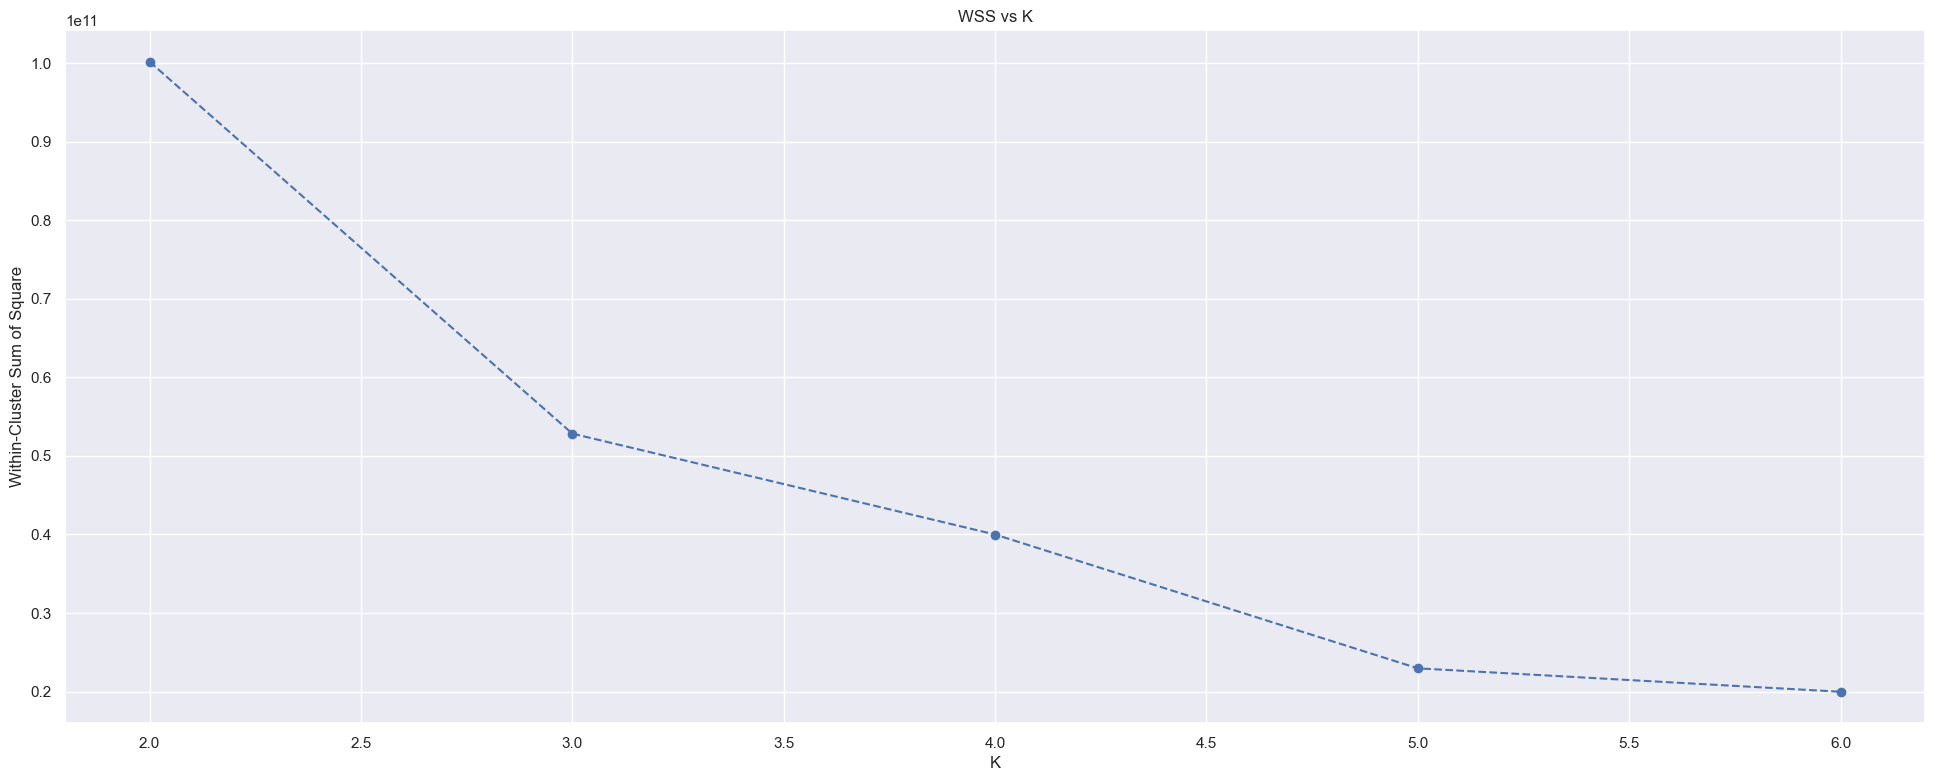

In [32]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300)
    
    # model training
    kmeans.fit(X)
    
    # model validation
    wss.append(kmeans.inertia_)

# plot WSS - Elbow Method
plt.plot(clusters, wss, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vs K')

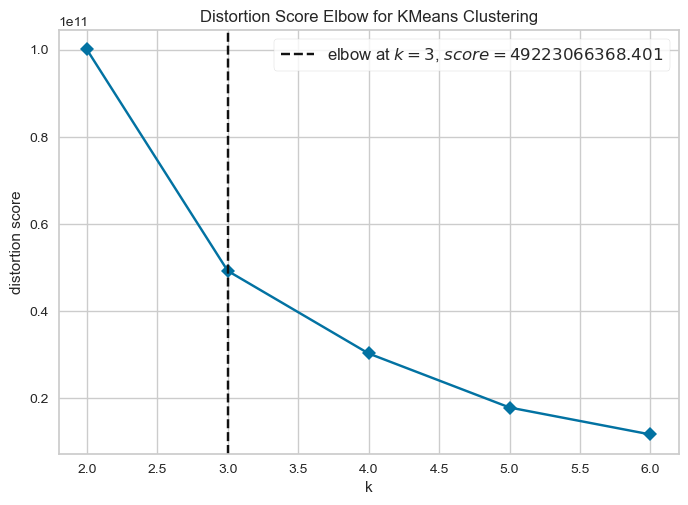

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit(X)
kmeans.show()

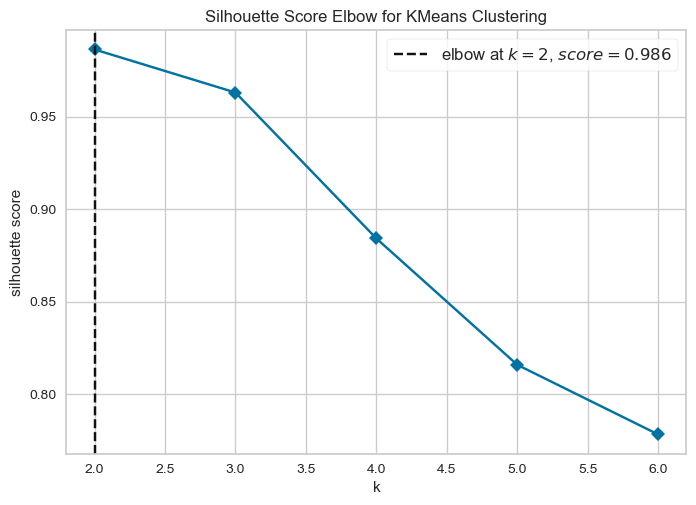

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show()

# <font color = 'red'> 8.0. Model Training </font>

## 8.1. K-Means

In [77]:
# model definition
k = 5
kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [78]:
# WSS (Within-Cluster Sum of Square)
print('WSS value: {}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS value: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

WSS value: 22956286930.93181
SS value: 0.7734960328917805


# <font color = 'red'> 9.0. Cluster Analysis </font>

In [79]:
df9 = df6.copy()

In [80]:
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,2
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,2
4,15100,635.10,330,6,2


## 9.1. Inspection

In [81]:
fig = px.scatter_3d(df9, x = 'recency_days', 
                    y = 'invoice_no', 
                    z = 'gross_revenue', 
                    color = 'cluster')

fig.show()

## 9.2. Cluster Profile

In [82]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,2
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,2
4,15100,635.10,330,6,2


In [83]:
# Number of customers
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Avg Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how = 'inner', on = 'cluster')

# Avg Recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how = 'inner', on = 'cluster')

# Avg invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how = 'inner', on = 'cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no
0,0,420,9.606587,5804.281619,25.119048,15.230952
1,1,38,0.869167,23181.925000,12.868421,43.078947
2,2,3896,89.112534,817.913748,99.906057,3.322382
3,3,15,0.343092,71423.516000,7.400000,67.866667
4,4,3,0.068618,241136.560000,3.000000,64.666667


### Cluster 01:
- Número de Customers: 420 (9.6%)
- Recência em média: 25 dias
- Compras em média: 15 compras
- Receita em média: US$5804.28

### Cluster 02: 
- Número de Customers: 38 (0.8%)
- Recência em média: 13 dias
- Compras em média: 43 compras
- Receita em média: US$23181.92

### Cluster 03:

- Número de Customers: 3896 (89%)
- Recência em média: 99 dias
- Compras em média: 3 compras
- Receita em média: US$817.91

### Cluster 04: 

- Número de Customers: 15 (0.3%)
- Recência em média: 7 dias
- Compras em média: 68 compras
- Receita em média: US$71423.51

### Cluster 05: 

- Número de Customers: 3 (0.06%)
- Recência em média: 3 dias
- Compras em média: 65 compras
- Receita em média: US$241136.56

# <font color = 'red'> 10.0. Deploy to Production </font>